In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
from plot import full_plot

In [2]:
#load json

In [20]:
#shunt resistances 
shunt_U = 10
shunt_R = 10/5
ref_voltage = 3.3
bit_acc = 10
test_duration = 60 * 3 

#load voltage_measements 
df_light = pd.read_csv( "./voltage_measurments/light.csv",skiprows=1)
f_light = 9370
m_light = test_duration * f_light
df_change = pd.read_csv("./voltage_measurments/change.csv",skiprows=1)
f_change = 9470
m_change = test_duration * f_change
df_random = pd.read_csv("./voltage_measurments/random.csv",skiprows=1)
f_random = 9480
m_random = test_duration * f_random

#normalize values to 3.3V 
keys_values = list(filter(lambda x : "value" in x, df_light.keys()))
keys_samples = list(filter(lambda x : "sample" in x, df_light.keys()))
df_light[keys_values] = (df_light[keys_values] / (2**bit_acc))*ref_voltage
df_change[keys_values] = (df_change[keys_values] / (2**bit_acc))*ref_voltage
df_random[keys_values] = (df_random[keys_values] / (2**bit_acc))*ref_voltage

#find max row value 
row_max_light = df_light[df_light.isin([int(m_light)]).any(axis=1)].index.values[0]
row_max_change = df_light[df_change.isin([int(m_change)]).any(axis=1)].index.values[0]
#row_max_random = df_random[df_random.isin([int(m_random)]).any(axis=1)].index.values[0]

#crop data frames 
df_light = df_light[:row_max_light]
df_change = df_change[:row_max_change]
df_random = df_random[:row_max_change]

#assignments 
#analog_current = ch1-ch0 / shunt_U
#digital_current = ch4-ch3 / shunt_R
#control_current = ch5-ch6 / shunt_R

def calc_derived_value(data_frame):
    voltage_analog = (data_frame[" value ch1"] - data_frame[" value ch0"])
    power_analog = voltage_analog**2 / shunt_U 
    
    digital_voltage = (data_frame[" value ch4"] - data_frame[" value ch3"])
    power_digital = digital_voltage**2 / shunt_R
    
    control_voltage = (data_frame[" value ch5"] - data_frame[" value ch6"])
    power_control = control_voltage**2 / shunt_R
    
    data_frame["power_analog"] = power_analog
    data_frame["power_digital"] = power_digital
    data_frame["power_total"] = power_analog + power_digital
    data_frame["power_control"] = power_control 
    
    return(data_frame)

df_light = calc_derived_value(df_light)
df_change = calc_derived_value(df_change)
df_random = calc_derived_value(df_random)
    

In [5]:
df_random[df_random.isin([int(170640)]).any(axis=1)].index

Int64Index([24377], dtype='int64')

In [6]:
df_random[:row_max_change]

sample ch0   value ch0   sample ch1   value ch1   sample ch2  \
0               0    2.803711            1    2.951953            2   
1               7    2.803711            8    2.948730            9   
2              14    2.800488           15    2.951953           16   
3              21    2.803711           22    2.948730           23   
4              28    2.803711           29    2.948730           30   
...           ...         ...          ...         ...          ...   
59995      419965    2.458887       419966    2.848828       419967   
59996      419972    2.445996       419973    2.829492       419974   
59997      419979    2.436328       419980    2.835938       419981   
59998      419986    2.426660       419987    2.861719       419988   
59999      419993    2.455664       419994    2.871387       419995   

        value ch2   sample ch3   value ch3   sample ch4   value ch4  \
0        2.803711            3    3.277441            4    3.296777   
1        2.803711           10    3.277441           11    3.296777   
2        2.800488           17    3.277441           18    3.296777   
3        2.800488           24    3.274219           25    3.296777   
4        2.803711           31    3.274219           32    3.296777   
...           ...          ...         ...          ...         ...   
59995    2.442773       419968    3.245215       419969    3.296777   
59996    2.426660       419975    3.245215       419976    3.296777   
59997    2.429883       419982    3.245215       419983    3.296777   
59998    2.465332       419989    3.248437       419990    3.296777   
59999    2.452441       419996    3.245215       419997    3.296777   

        sample ch5   value ch5   sample ch6   value ch6  
0                5    3.296777            6    3.254883  
1               12    3.296777           13    3.241992  
2               19    3.296777           20    3.254883  
3               26    3.296777           27    3.258105  
4               33    3.290332           34    3.258105  
...            ...         ...          ...         ...  
59995       419970    3.296777       419971    3.248437  
59996       419977    3.296777       419978    3.254883  
59997       419984    3.296777       419985    3.248437  
59998       419991    3.296777       419992    3.254883  
59999       419998    3.296777       419999    3.261328  

[60000 rows x 14 columns]

# Voltage Occupancy Time

### random

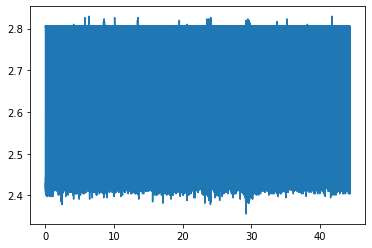

In [7]:
#Voltage vs Time Charts
plt.plot(df_random[" sample ch2"]* 1/(9473.54),df_random[" value ch2"])

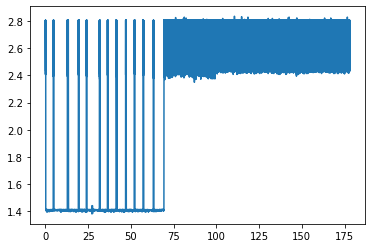

In [8]:
#%matplotlib
plt.plot(df_light[" sample ch2"]* 1/(9473.54),df_light[" value ch2"])
#plt.show()

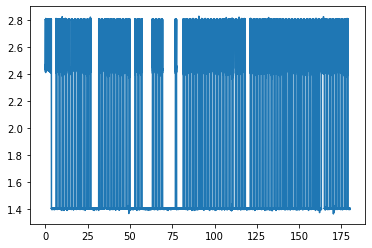

In [9]:

plt.plot(df_change[" sample ch2"]* 1/(9473.54),df_change[" value ch2"])
plt.show()

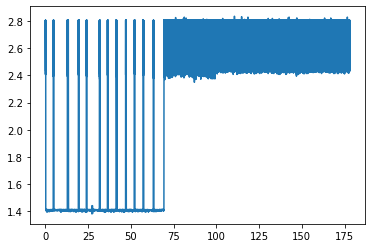

In [10]:
#%matplotlib
plt.plot(df_light[" sample ch2"]* 1/(9473.54),df_light[" value ch2"])
#plt.show()

In [38]:
#power vs policy 
policies = ["random", "light", "change"]
control = np.mean(df_random["power_control"])# + np.mean(df_light["power_control"]) + np.mean(df_change["power_control"])
#control = 
power = [np.mean(df_random["power_total"]),np.mean(df_light["power_total"]),np.mean(df_change["power_total"])]

<BarContainer object of 3 artists>

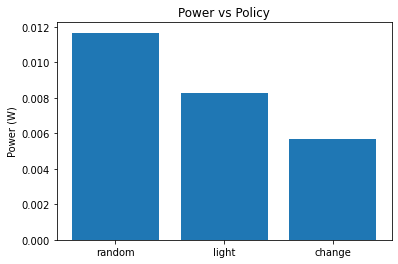

In [40]:
plt.title("Power vs Policy")
plt.ylabel("Power (W)")
plt.bar(policies,power)

In [49]:
#load json
import json 
j_light = open("./light_times.json")
j_change = open("./change_times.json")
j_random = open("./random_times.json")

d_light = json.load(j_light)
d_change = json.load(j_change)
d_random = json.load(j_random)



In [54]:
keys = ['2.8', '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2.0', '1.9', '1.8', '1.7', '1.6', '1.5', '1.4']
keys.reverse()
v_light = []
v_change = []
v_random = []
for key in keys: 
    v_light.append(d_light[key])
    v_change.append(d_change[key])
    v_random.append(d_random[key])
    

<BarContainer object of 15 artists>

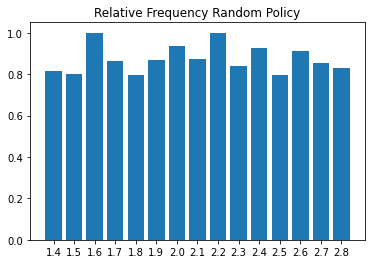

In [55]:
plt.title("Relative Frequency Random Policy")
plt.bar(keys,np.array(v_random) / max(v_random))

<BarContainer object of 15 artists>

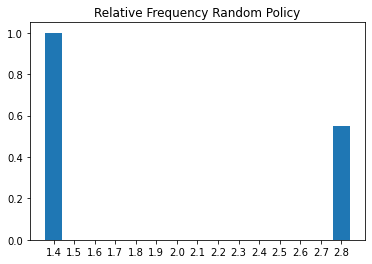

In [56]:
plt.title("Relative Frequency Change Policy")
plt.bar(keys,np.array(v_change) / max(v_change))

<BarContainer object of 15 artists>

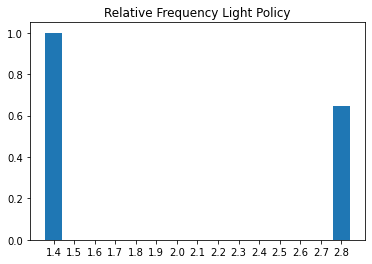

In [57]:
plt.title("Relative Frequency Light Policy")
plt.bar(keys,np.array(v_light) / max(v_light))